In [104]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import matplotlib as mpl
from pathlib import Path

In [105]:
# Definisci solo la cartella base
base_dir = Path('/Users/lorenzosisti/DDC_new/7_ottobre')

In [106]:
# ENERGY MINIMIZATION

# Load files using base_dir
potential_em_open_1   = np.loadtxt(base_dir / 'open_em_rep1.xvg', comments=["@", "%", "#"])
potential_em_open_2   = np.loadtxt(base_dir / 'open_em_rep2.xvg', comments=["@", "%", "#"])
potential_em_open_3   = np.loadtxt(base_dir / 'open_em_rep3.xvg', comments=["@", "%", "#"])

potential_em_closed_1=np.loadtxt(base_dir / 'closed_em_rep1.xvg', comments =["@", "%", "#"])
potential_em_closed_2=np.loadtxt(base_dir / 'closed_em_rep2.xvg', comments =["@", "%", "#"])
potential_em_closed_3=np.loadtxt(base_dir / 'closed_em_rep3.xvg', comments =["@", "%", "#"])

# Define separate time vectors for each replica (in ns)
time_em_open_1   = potential_em_open_1[:,0] / 1000.0
time_em_open_2   = potential_em_open_2[:,0] / 1000.0
time_em_open_3   = potential_em_open_3[:,0] / 1000.0

time_em_closed_1 = potential_em_closed_1[:,0] / 1000.0
time_em_closed_2 = potential_em_closed_2[:,0] / 1000.0
time_em_closed_3 = potential_em_closed_3[:,0] / 1000.0

# Extract potential energy values
em_open_1   = potential_em_open_1[:,1]
em_open_2   = potential_em_open_2[:,1]
em_open_3   = potential_em_open_3[:,1]

em_closed_1 = potential_em_closed_1[:,1]
em_closed_2 = potential_em_closed_2[:,1]
em_closed_3 = potential_em_closed_3[:,1]

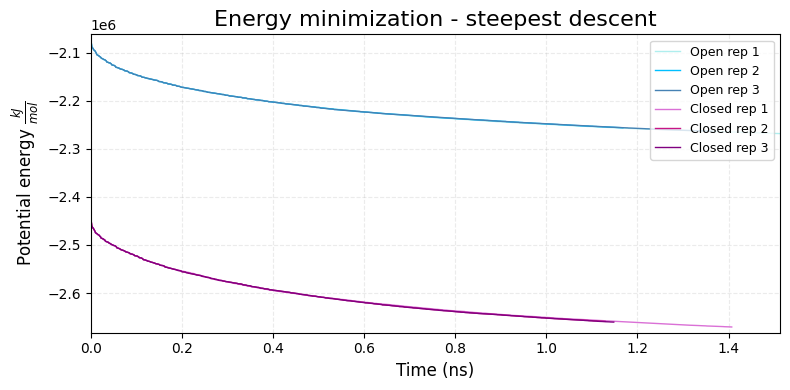

In [120]:
# -----------------------
# FIGURA: POTENZIALE (3 rep)
# -----------------------
fig, ax = plt.subplots(figsize=(8, 4))

# --- Plotta le tre curve OPEN---
ax.plot(time_em_open_1, em_open_1, c='paleturquoise', label='Open rep 1', linewidth=1.0)
ax.plot(time_em_open_2, em_open_2, c='deepskyblue', label='Open rep 2', linewidth=1.0)
ax.plot(time_em_open_3, em_open_3, c='steelblue', label='Open rep 3', linewidth=1.0)
# --- Plotta le tre curve CLOSED---
ax.plot(time_em_closed_1, em_closed_1, c='orchid', label='Closed rep 1', linewidth=1.0)
ax.plot(time_em_closed_2, em_closed_2, c='mediumvioletred', label='Closed rep 2', linewidth=1.0)
ax.plot(time_em_closed_3, em_closed_3, c='purple', label='Closed rep 3', linewidth=1.0)

ax.set_title('Energy minimization - steepest descent', fontsize=16)

# --- Limiti automatici con margine ---
ax.set_xlim([0, np.max(time_em)])
all_vals = np.concatenate([em_open_1, em_open_2, em_open_3, em_closed_1, em_closed_2, em_closed_3])
margin = 0.02 * (np.max(all_vals) - np.min(all_vals))
ax.set_ylim([np.min(all_vals)-margin, np.max(all_vals)+margin])

# --- Etichette e stile ---
ax.set_xlabel('Time (ns)', fontsize=12)
ax.set_ylabel(r'Potential energy $\frac{kJ}{mol}$', fontsize=12)
ax.tick_params(labelsize=10)
ax.legend(fontsize=9, frameon=True, loc='upper right')
ax.grid(alpha=0.25, linestyle='--')

plt.tight_layout()
plt.savefig('potential_em.png', dpi=300, bbox_inches='tight')
plt.show()

In [108]:
# RMSF

rmsf_open_1 = np.loadtxt(base_dir / 'rmsf_open_rep1_def.xvg', comments =["@", "%", "#"])
rmsf_open_2 = np.loadtxt(base_dir / 'rmsf_open_rep2_def.xvg', comments =["@", "%", "#"])
rmsf_open_3 = np.loadtxt(base_dir / 'rmsf_open_rep3_def.xvg', comments =["@", "%", "#"])

rmsf_closed_1 = np.loadtxt(base_dir / 'rmsf_closed_rep1_def.xvg', comments =["@", "%", "#"])
rmsf_closed_2 = np.loadtxt(base_dir / 'rmsf_closed_rep2_def.xvg', comments =["@", "%", "#"])
rmsf_closed_3 = np.loadtxt(base_dir / 'rmsf_closed_rep3_def.xvg', comments =["@", "%", "#"])

index = rmsf_open_1[:,0]

rmsf_open_1 = rmsf_open_1[:,1]
rmsf_open_2 = rmsf_open_2[:,1]
rmsf_open_3 = rmsf_open_3[:,1]
rmsf_closed_1 = rmsf_closed_1[:,1]
rmsf_closed_2 = rmsf_closed_2[:,1]
rmsf_closed_3 = rmsf_closed_3[:,1]

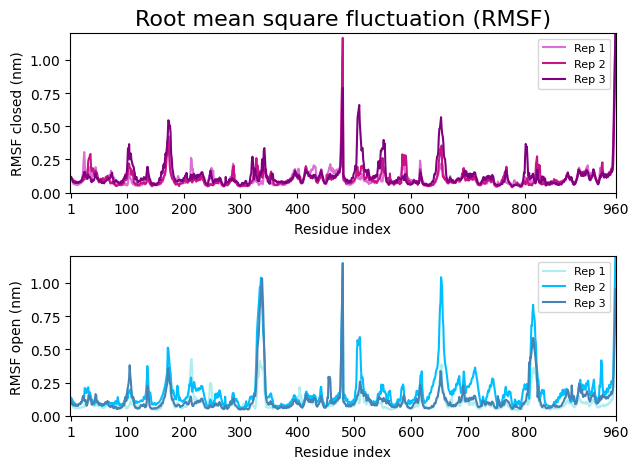

In [109]:
# ----------------------- 
# RMSF OPEN (3 rep) 
# ----------------------- 
ax1 = plt.subplot(212) 
# --- Plotta le due curve --- 
ax1.plot(index, rmsf_open_1, c='paleturquoise', label="Rep 1") 
ax1.plot(index, rmsf_open_2, c='deepskyblue', label="Rep 2") 
ax1.plot(index, rmsf_open_3, c='steelblue', label="Rep 3") 
#ax1.set_title(r'RMSF', fontsize=16)

# --- Impostazioni assi --- 
ax1.set_xlim([0, 960]) 
ax1.set_ylim([0, 1.2]) 
ax1.set_xlabel(r'Residue index', fontsize=10) 
ax1.set_ylabel(r'RMSF open (nm)', fontsize=10) 
ax1.set_xticks([1, 100, 200, 300, 400, 500, 600, 700, 800, 960]) 
ax1.legend(fontsize=8) 
#plt.tight_layout() 

# ----------------------- 
# RMSF CLOSED (3 rep) 
# ----------------------- 
ax2 = plt.subplot(211) 
# --- Plotta le due curve --- 
ax2.plot(index, rmsf_closed_1, c='orchid', label="Rep 1") 
ax2.plot(index, rmsf_closed_2, c='mediumvioletred', label="Rep 2") 
ax2.plot(index, rmsf_closed_3, c='purple', label="Rep 3") 
ax2.set_title('Root mean square fluctuation (RMSF)', fontsize=16)

# --- Impostazioni assi --- 
ax2.set_xlim([0, 960]) 
ax2.set_ylim([0, 1.2]) 
ax2.set_xlabel(r'Residue index', fontsize=10) 
ax2.set_ylabel(r'RMSF closed (nm)', fontsize=10) 
ax2.set_xticks([1, 100, 200, 300, 400, 500, 600, 700, 800, 960]) 
ax2.legend(fontsize=8) 
plt.tight_layout() 
#plt.savefig('rmsf_combined.png', dpi=300, bbox_inches='tight') 
#plt.show()

In [110]:
# RMSD

rmsd_open_1=np.loadtxt(base_dir / 'rmsd_open_rep1.xvg', comments =["@", "%", "#"])
rmsd_open_2=np.loadtxt(base_dir / 'rmsd_open_rep2.xvg', comments =["@", "%", "#"])
rmsd_open_3=np.loadtxt(base_dir / 'rmsd_open_rep3.xvg', comments =["@", "%", "#"])

rmsd_closed_1=np.loadtxt(base_dir / 'rmsd_closed_rep1.xvg', comments =["@", "%", "#"])
rmsd_closed_2=np.loadtxt(base_dir / 'rmsd_closed_rep2.xvg', comments =["@", "%", "#"])
rmsd_closed_3=np.loadtxt(base_dir / 'rmsd_closed_rep3.xvg', comments =["@", "%", "#"])

#time = rmsd_open_1[:,0] 

# Vettori di tempo separati (in ns)
time_open_1   = rmsd_open_1[:,0] / 1000.0
time_open_2   = rmsd_open_2[:,0] / 1000.0
time_open_3   = rmsd_open_3[:,0] / 1000.0

time_closed_1 = rmsd_closed_1[:,0] / 1000.0
time_closed_2 = rmsd_closed_2[:,0] / 1000.0
time_closed_3 = rmsd_closed_3[:,0] / 1000.0

rmsd_open_1= rmsd_open_1[:,1]
rmsd_open_2= rmsd_open_2[:,1]
rmsd_open_3= rmsd_open_3[:,1]
rmsd_closed_1= rmsd_closed_1[:,1]
rmsd_closed_2= rmsd_closed_2[:,1]
rmsd_closed_3= rmsd_closed_3[:,1]

/var/folders/9z/m_kyptn90sdcgsmxxq_fjnjc0000gn/T/ipykernel_79473/467069665.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


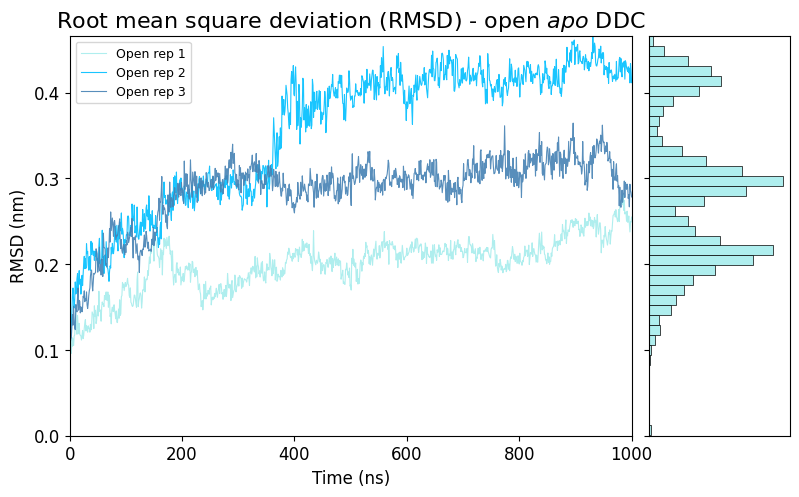

/var/folders/9z/m_kyptn90sdcgsmxxq_fjnjc0000gn/T/ipykernel_79473/467069665.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


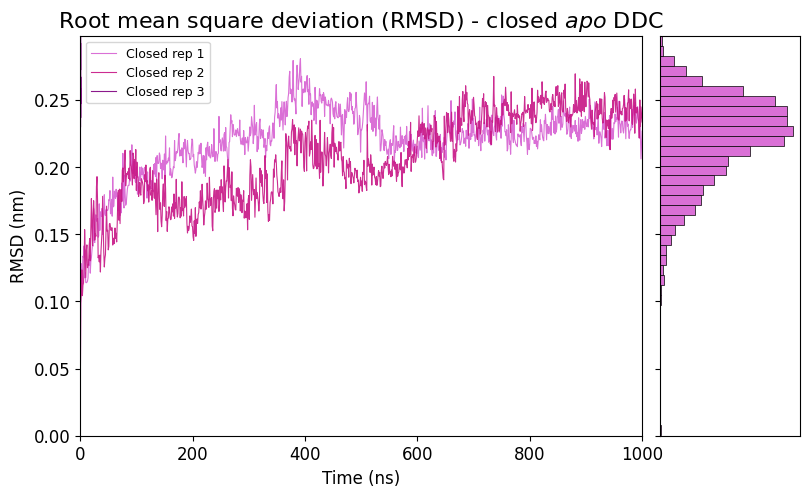

In [119]:
# -----------------------
# FIGURA 1: APO (3 rep)
# -----------------------
fig = plt.figure(figsize=(9,5))

gs = fig.add_gridspec(1, 2, width_ratios=(4, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

# opzionale: mantieni la tua 's' se vuoi, anche se non serve
s = fig.add_gridspec(1, 2, width_ratios=(4, 1),
                     left=0.1, right=0.9, bottom=0.1, top=0.9,
                     wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[0, 0])
ax_histy = fig.add_subplot(gs[0, 1], sharey=ax)

# nascondi label y per l'istogramma
ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.tick_params(axis="x", labelbottom=False, bottom=False)

# plot delle 3 ripetizioni APO
ax.plot(time_open_1, rmsd_open_1, linewidth=0.8, color='paleturquoise', label='Open rep 1')
ax.plot(time_open_2, rmsd_open_2, linewidth=0.8, color='deepskyblue', label='Open rep 2', alpha=0.9)
ax.plot(time_open_3, rmsd_open_3, linewidth=0.8, color='steelblue', label='Open rep 3', alpha=0.9)

ax.set_title(r'Root mean square deviation (RMSD) - open $\mathit{apo}$ DDC', fontsize=16)
ax.set_xlim([0, 1000])
# ylim calcolato sulle 3 rep APO
all_apo = np.concatenate([rmsd_open_1, rmsd_open_2, rmsd_open_3])
ymax_apo = np.max(all_apo)
ax.set_ylim([0, max(ymax_apo, 0.1)])

ax.tick_params(labelsize=12)
ax.set_xlabel(r'Time (ns)', fontsize=12)
ax.set_ylabel(r'RMSD (nm)', fontsize=12)
ax.legend(fontsize=9, ncol=1, frameon=True)

# istogramma APO (combinato delle 3 rep)
bins = 40
ax_histy.hist(all_apo, bins=bins, orientation='horizontal',
              color='paleturquoise', edgecolor='k', linewidth=0.5)
ax_histy.tick_params(labelsize=12)
plt.setp(ax_histy.get_yticklabels(), visible=False)

plt.tight_layout()
plt.savefig('rmsd_apo_combined.png', dpi=300, bbox_inches='tight')
plt.show()

# -----------------------
# FIGURA 2: SYS (3 rep)
# -----------------------
fig = plt.figure(figsize=(9,5))

gs = fig.add_gridspec(1, 2, width_ratios=(4, 1),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0.05, hspace=0.05)

s = fig.add_gridspec(1, 2, width_ratios=(4, 1),
                     left=0.1, right=0.9, bottom=0.1, top=0.9,
                     wspace=0.05, hspace=0.05)

ax = fig.add_subplot(gs[0, 0])
ax_histy = fig.add_subplot(gs[0, 1], sharey=ax)

ax_histy.tick_params(axis="y", labelleft=False)
ax_histy.tick_params(axis="x", labelbottom=False, bottom=False)

# plot delle 3 ripetizioni SYS
ax.plot(time_closed_1, rmsd_closed_1, linewidth=0.8, color='orchid', label='Closed rep 1')
ax.plot(time_closed_2, rmsd_closed_2, linewidth=0.8, color='mediumvioletred', label='Closed rep 2', alpha=0.9)
ax.plot(time_closed_3, rmsd_closed_3, linewidth=0.8, color='purple', label='Closed rep 3', alpha=0.9)

ax.set_title(r'Root mean square deviation (RMSD) - closed $\mathit{apo}$ DDC', fontsize=16)
ax.set_xlim([0, 1000])
# ylim calcolato sulle 3 rep SYS
all_sys = np.concatenate([rmsd_closed_1, rmsd_closed_2, rmsd_closed_3])
ymax_sys = np.max(all_sys)
ax.set_ylim([0, max(ymax_sys, 0.1)])

ax.tick_params(labelsize=12)
ax.set_xlabel(r'Time (ns)', fontsize=12)
ax.set_ylabel(r'RMSD (nm)', fontsize=12)
ax.legend(fontsize=9, ncol=1, frameon=True)

# istogramma SYS (combinato delle 3 rep)
ax_histy.hist(all_sys, bins=bins, orientation='horizontal',
              color='orchid', edgecolor='k', linewidth=0.5)
ax_histy.tick_params(labelsize=12)
plt.setp(ax_histy.get_yticklabels(), visible=False)

plt.tight_layout()
plt.savefig('rmsd_sys_combined.png', dpi=300, bbox_inches='tight')
plt.show()

In [125]:
# GYRATION RADIUS

gyration_open_1 = np.loadtxt(base_dir / 'gyration_open_1.xvg', comments =["@", "%", "#"])
gyration_open_2 = np.loadtxt(base_dir / 'gyration_open_2.xvg', comments =["@", "%", "#"])
gyration_open_3 = np.loadtxt(base_dir / 'gyration_open_3.xvg', comments =["@", "%", "#"])

gyration_closed_1 = np.loadtxt(base_dir / 'gyration_closed_1.xvg', comments =["@", "%", "#"])
gyration_closed_2 = np.loadtxt(base_dir / 'gyration_closed_2.xvg', comments =["@", "%", "#"])
gyration_closed_3 = np.loadtxt(base_dir / 'gyration_closed_3.xvg', comments =["@", "%", "#"])

time_gyr   = gyration_open_1[:,0]   / 1000.0  # ns

rg_open_1     = gyration_open_1[:,1]
rg_open_2     = gyration_open_2[:,1]
rg_open_3     = gyration_open_3[:,1]
rg_closed_1   = gyration_closed_1[:,1]
rg_closed_2   = gyration_closed_2[:,1]
rg_closed_3   = gyration_closed_3[:,1]

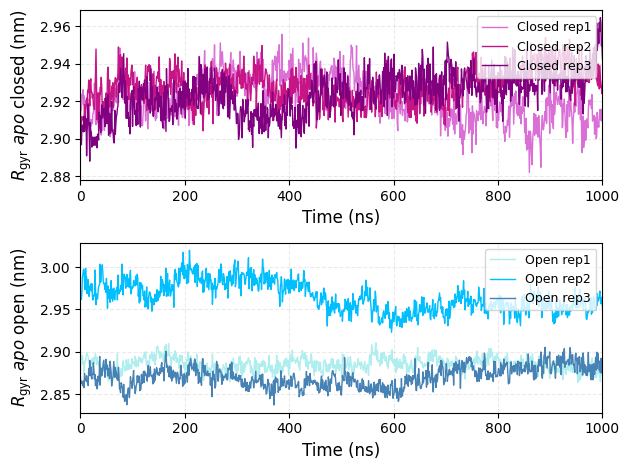

In [126]:
# -----------------------
# FIGURA 1: OPEN (3 rep)
# -----------------------
ax1 = plt.subplot(212)

ax1.plot(time_gyr, rg_open_1, c='paleturquoise', label='Open rep1', linewidth=1.0)
ax1.plot(time_gyr, rg_open_2, c='deepskyblue', label='Open rep2', linewidth=1.0)
ax1.plot(time_gyr, rg_open_3, c='steelblue', label='Open rep3', linewidth=1.0)

ax1.set_xlim([0, np.max(time_gyr)])   # o imposta un limite fisso come [0, 200]
# imposta ylim calcolando il massimo tra le 3 rep per una scala sensata
all_open = np.concatenate([rg_open_1, rg_open_2, rg_open_3])
ax.set_ylim([np.min(all_open)*0.5, np.max(all_open)*2])

ax1.set_xlabel(r'Time (ns)', fontsize=12)
ax1.set_ylabel(r'$R_\mathrm{gyr}$ $\mathit{apo}$ open (nm)', fontsize=12)
ax1.tick_params(labelsize=10)
ax1.legend(fontsize=9, frameon=True, loc='upper right')
ax1.grid(alpha=0.25, linestyle='--')

# -----------------------
# FIGURA 2: CLOSED (3 rep)
# -----------------------
ax2 = plt.subplot(211)

ax2.plot(time_gyr, rg_closed_1, c='orchid', label='Closed rep1', linewidth=1.0)
ax2.plot(time_gyr, rg_closed_2, c='mediumvioletred', label='Closed rep2', linewidth=1.0)
ax2.plot(time_gyr, rg_closed_3, c='purple', label='Closed rep3', linewidth=1.0)

ax2.set_xlim([0, np.max(time_gyr)])
all_closed = np.concatenate([rg_closed_1, rg_closed_2, rg_closed_3])
ax.set_ylim([np.min(all_closed)*0.5, np.max(all_closed)*2])

ax2.set_xlabel(r'Time (ns)', fontsize=12)
ax2.set_ylabel(r'$R_\mathrm{gyr}$ $\mathit{apo}$ closed (nm)', fontsize=12)
ax2.tick_params(labelsize=10)
ax2.legend(fontsize=9, frameon=True, loc='upper right')
ax2.grid(alpha=0.25, linestyle='--')

plt.tight_layout()
plt.savefig('gyration_closed_3rep.png', dpi=300, bbox_inches='tight')
plt.show()